<img src="https://miro.medium.com/v2/resize:fit:1400/1*zomnCz8-VMgrSV8eLCx2tw.gif" width="200" alt="molecula"  />

---
$$\Large \textit{Sociedad Química del Perú | Curso: Inteligencia Artificial para la Escritura Científica}$$

---
<br>

$$\large\textbf{Introducción al Lenguaje de Programación Python}$$


$$\textit{Parte Práctica}$$

<br>
<br>

Autor: __Jesus Alvarado-Huayhuaz__

# A. Introducción

En esta segunda parte vamos a explorar la página web de la Superintendencia Nacional de Educación Superior Universitaria (SUNEDU) y aprenderemos a utilizar herramientas para filtrar información y compararla mediante gráficas, mediante Pandas y Matplotlib, respectivamente.

Abordemos las siguiente preguntas:

1. ¿Cuál es la proporción entre universidades públicas y privadas en el Perú?

2. ¿En qué año se creó la mayor cantidad de universidades?

3. ¿En qué departamento se concentra la mayor cantidad de universidades?

4. Actividad: ¿En qué universidades de Perú se enseña la carrera de Química?

# B. Librerías necesarias

En este apartado vamos a importar o disponer de las funciones que nos facilitan los programas Pandas, para trabajar con DataFrames, Matplotlib, para graficar y Numpy para realizar operaciones aritméticas, entre otras. Estos ya se encuentran previamente instalados en los servidores de Google.

In [3]:
!pwd

/content


In [4]:
!ls

sample_data


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# C. Desarrollo de las preguntas

## 1. ¿Cuál es la proporción entre universidades públicas y privadas en el Perú?

In [6]:
url = 'https://www.sunedu.gob.pe/lista-universidades/'
df = pd.read_html(url)

In [8]:
df_publicas = df[0]
df_publicas.head()

,N°,UNIVERSIDAD,DEPARTAMENTO,PROVINCIA,DISPOSITIVO LEGAL DE CREACIÓN,FECHA DE CREACIÓN,DISPOSITIVO LEGAL DE LICENCIAMIENTO,FECHA DE PUB. DIARIO EL PERUANO
0,1,Universidad Nacional Mayor de San Marcos,Lima,Lima,Real Cédula de Fundación,12/05/1551,Res. N° 036-2018-SUNEDU/CD,04/04/2018
1,2,Universidad Nacional de San Cristóbal de Huamanga,Ayacucho,Huamanga,Ley N° 12828,03/07/1677,Res. N° 050-2018-SUNEDU/CD,01/06/2018
2,3,Universidad Nacional de San Antonio Abad del C...,Cusco,Cusco,Real Cédula de Fundación,01/06/1692,Res. N° 059-2019-SUNEDU/CD,04/05/2019
3,4,Universidad Nacional de Trujillo,La Libertad,Trujillo,Decreto Directoral,10/05/1824,Res. N° 127-2018-SUNEDU/CD,20/09/2018
4,5,Universidad Nacional de San Agustín de Arequipa,Arequipa,Arequipa,Acta de Instalación,11/11/1828,Res. N° 098-2018-SUNEDU/CD,27/08/2018


In [10]:
len(df_publicas)

50

In [13]:
df[3]

,(*)Universidades que cambiaron de denominación,(*)Universidades que cambiaron de denominación.1
0,1,Denominación anterior: Universidad Privada de ...
1,2,Denominación anterior: Universidad Privada de ...
2,3,Denominación anterior: Universidad Particular ...
3,4,Denominación anterior: Universidad Privada los...
4,5,"Denominación anterior: Universidad Privada ""Ab..."
5,6,"Denominación anterior: Universidad Privada ""Sa..."
6,7,Denominación anterior: Universidad Continental...
7,8,Denominación anterior: Universidad Católica de...
8,9,Denominación anterior: Universidad Ada A. Byro...
9,10,Denominación anterior: Universidad Católica de...


In [14]:
len(df_privadas)

92

In [11]:
df_privadas = df[2]
df_privadas.head(3)

,N°,UNIVERSIDAD,DEPARTAMENTO,PROVINCIA,DISPOSITIVO LEGAL DE CREACIÓN,FECHA DE CREACIÓN,DISPOSITIVO LEGAL DE LICENCIAMIENTO O DENEGATORIA,FECHA DE PUB. DIARIO EL PERUANO,CONDICIÓN JURÍDICA
0,1,Pontificia Universidad Católica del Perú,Lima,Lima,Decreto Supremo,24/03/1917,Res. N° 025-2016-SUNEDU/CD,06/07/2016,Asociativa
1,2,Universidad Peruana Cayetano Heredia,Lima,Lima,Decreto Supremo N° 18,22/09/1961,Res. N° 029-2016-SUNEDU/CD,27/07/2016,Asociativa
2,3,Universidad Católica de Santa María,Arequipa,Arequipa,Decreto Supremo N° 24,06/12/1961,Res. N° 102-2017-SUNEDU/CD,31/12/2017,Asociativa


In [15]:
# Si queremos guardar el DataFrame como un CSV
df_privadas.to_csv('privadas.csv')
df_publicas.to_csv('publicas.csv')

In [25]:
cantidad = [len(df_publicas), len(df_privadas)]
cantidad

[50, 92]

In [26]:
universidades = ['Públicas','Privadas']

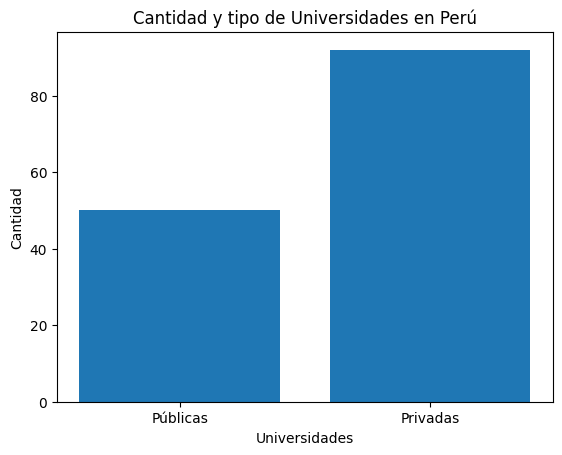

In [27]:
plt.bar(universidades,cantidad)
plt.title('Cantidad y tipo de Universidades en Perú')
plt.xlabel('Universidades')
plt.ylabel('Cantidad')
plt.show()

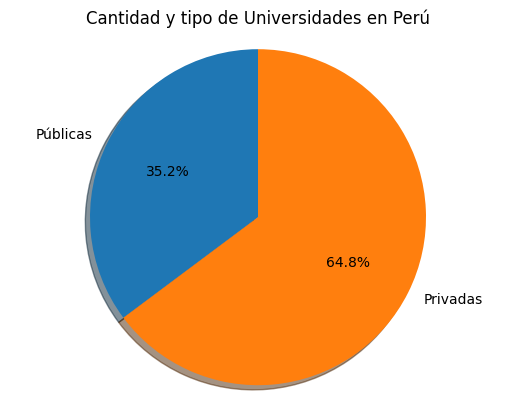

In [21]:
# [Extra] Pie plot

fig, ax = plt.subplots()
ax.pie(cantidad, labels=universidades, autopct='%1.1f%%',
       shadow={'ox': -0.04,
               'edgecolor': 'none',
               'shade': 0.9},
       startangle=90,
       #radius=0.5
       )
ax.axis('equal')
plt.title('Cantidad y tipo de Universidades en Perú')
plt.show()

#Ref: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

# 2. ¿En qué año se creó la mayor cantidad de universidades?

Primero establecemos el formato de fecha para la columna que contiene la información "FECHA DE CREACIÓN"

In [ ]:
df_publicas['FECHA DE CREACIÓN'] = pd.to_datetime(df_publicas['FECHA DE CREACIÓN'], errors='coerce')

Hemos empleado 'coerce' para que el análisis no válido se establezca como NaT (Not at time). A continuación llamamos obtenemos unicamente el año.

In [ ]:
df_publicas['FECHA'] = df_publicas['FECHA DE CREACIÓN'].dt.year

Veamos el resultado en la última columna "FECHA"

In [ ]:
df_publicas.head(5)

,N°,UNIVERSIDAD,DEPARTAMENTO,PROVINCIA,DISPOSITIVO LEGAL DE CREACIÓN,FECHA DE CREACIÓN,DISPOSITIVO LEGAL DE LICENCIAMIENTO,FECHA DE PUB. DIARIO EL PERUANO,FECHA
0,1,Universidad Nacional Mayor de San Marcos,Lima,Lima,Real Cédula de Fundación,NaT,Res. N° 036-2018-SUNEDU/CD,04/04/2018,1551.0
1,2,Universidad Nacional de San Cristóbal de Huamanga,Ayacucho,Huamanga,Ley N° 12828,NaT,Res. N° 050-2018-SUNEDU/CD,01/06/2018,1677.0
2,3,Universidad Nacional de San Antonio Abad del C...,Cusco,Cusco,Real Cédula de Fundación,1692-01-06,Res. N° 059-2019-SUNEDU/CD,04/05/2019,1692.0
3,4,Universidad Nacional de Trujillo,La Libertad,Trujillo,Decreto Directoral,1824-10-05,Res. N° 127-2018-SUNEDU/CD,20/09/2018,1824.0
4,5,Universidad Nacional de San Agustín de Arequipa,Arequipa,Arequipa,Acta de Instalación,1828-11-11,Res. N° 098-2018-SUNEDU/CD,27/08/2018,1828.0


¿Qué diferencias encontramos en nuestra tabla con la original?

In [ ]:
df_publicas['FECHA'].iloc[0] = float(1551.0)
df_publicas['FECHA'].iloc[1] = float(1677)

<ipython-input-29-4accaf5ee196>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_publicas['FECHA'].iloc[0] = float(1551.0)
<ipython-input-29-4accaf5ee196>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_publicas['FECHA'].iloc[1] = float(1677)


Veamos la tabla luego de la corrección:

In [ ]:
df_publicas.head(5)

,N°,UNIVERSIDAD,DEPARTAMENTO,PROVINCIA,DISPOSITIVO LEGAL DE CREACIÓN,FECHA DE CREACIÓN,DISPOSITIVO LEGAL DE LICENCIAMIENTO,FECHA DE PUB. DIARIO EL PERUANO,FECHA
0,1,Universidad Nacional Mayor de San Marcos,Lima,Lima,Real Cédula de Fundación,NaT,Res. N° 036-2018-SUNEDU/CD,04/04/2018,1551.0
1,2,Universidad Nacional de San Cristóbal de Huamanga,Ayacucho,Huamanga,Ley N° 12828,NaT,Res. N° 050-2018-SUNEDU/CD,01/06/2018,1677.0
2,3,Universidad Nacional de San Antonio Abad del C...,Cusco,Cusco,Real Cédula de Fundación,1692-01-06,Res. N° 059-2019-SUNEDU/CD,04/05/2019,1692.0
3,4,Universidad Nacional de Trujillo,La Libertad,Trujillo,Decreto Directoral,1824-10-05,Res. N° 127-2018-SUNEDU/CD,20/09/2018,1824.0
4,5,Universidad Nacional de San Agustín de Arequipa,Arequipa,Arequipa,Acta de Instalación,1828-11-11,Res. N° 098-2018-SUNEDU/CD,27/08/2018,1828.0


Ahora ya podemos contar todos los años en que se crearon las universidades y contar cuantas veces ocurrieron, para ello usamos el comando "value_counts"

In [ ]:
# Contar los valores repetidos en una columna
df_publicas['FECHA'].value_counts()

FECHA
2011.0    6
2010.0    6
2000.0    4
1961.0    3
1955.0    2
1962.0    2
1979.0    2
1964.0    2
1965.0    2
1984.0    2
2008.0    1
2007.0    1
2005.0    1
2004.0    1
2001.0    1
2009.0    1
1990.0    1
1551.0    1
1977.0    1
1971.0    1
1677.0    1
1968.0    1
1966.0    1
1963.0    1
1960.0    1
1828.0    1
1824.0    1
1692.0    1
1970.0    1
Name: count, dtype: int64

Con esta información podemos responder la pregunta, pero siempre es útil facilitar la comprensión del análisis mediante una gráfica. Si guardamos esta última información en "mi_tabla" podemos graficarla como un barplot:

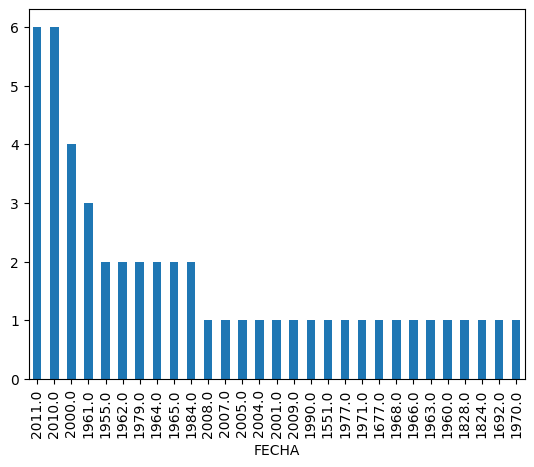

In [ ]:
# Graficamos por fechas
mi_tabla = df_publicas['FECHA'].value_counts()
mi_tabla.plot(kind='bar')
plt.show()

Por lo tanto, en el 2010 y 2011 se creó la mayor cantidad de universidades públicas. Para observar mejor la distribución de esta información respecto del total del tiempo evaluado, el tamaño de la gráfica, entre otros, podemos emplear los siguientes comandos:

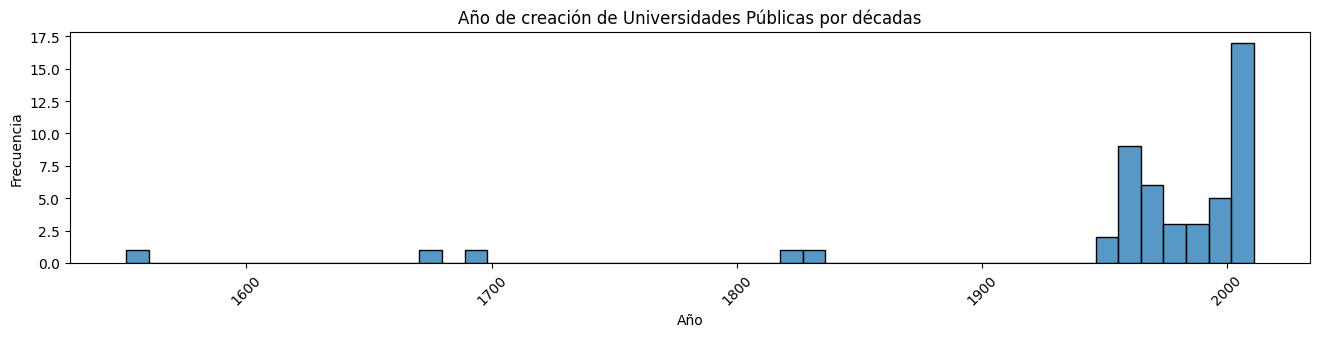

In [ ]:
plt.figure(figsize=(16, 3))
plt.xticks(rotation=45)
plt.xlabel('Año')
plt.ylabel('Frecuencia')
#plt.grid(True)
plt.title('Año de creación de Universidades Públicas por décadas')
sns.histplot(df_publicas['FECHA'], bins=50); #, kde=True)

Tal vez Excel es una herramienta con la que estamos más familiarizados. La siguiente celda muestra la figura obtenida con Excel y aparece intervalos en el eje X, como un desafío, modifica el código python previo para reproducir esta figura.

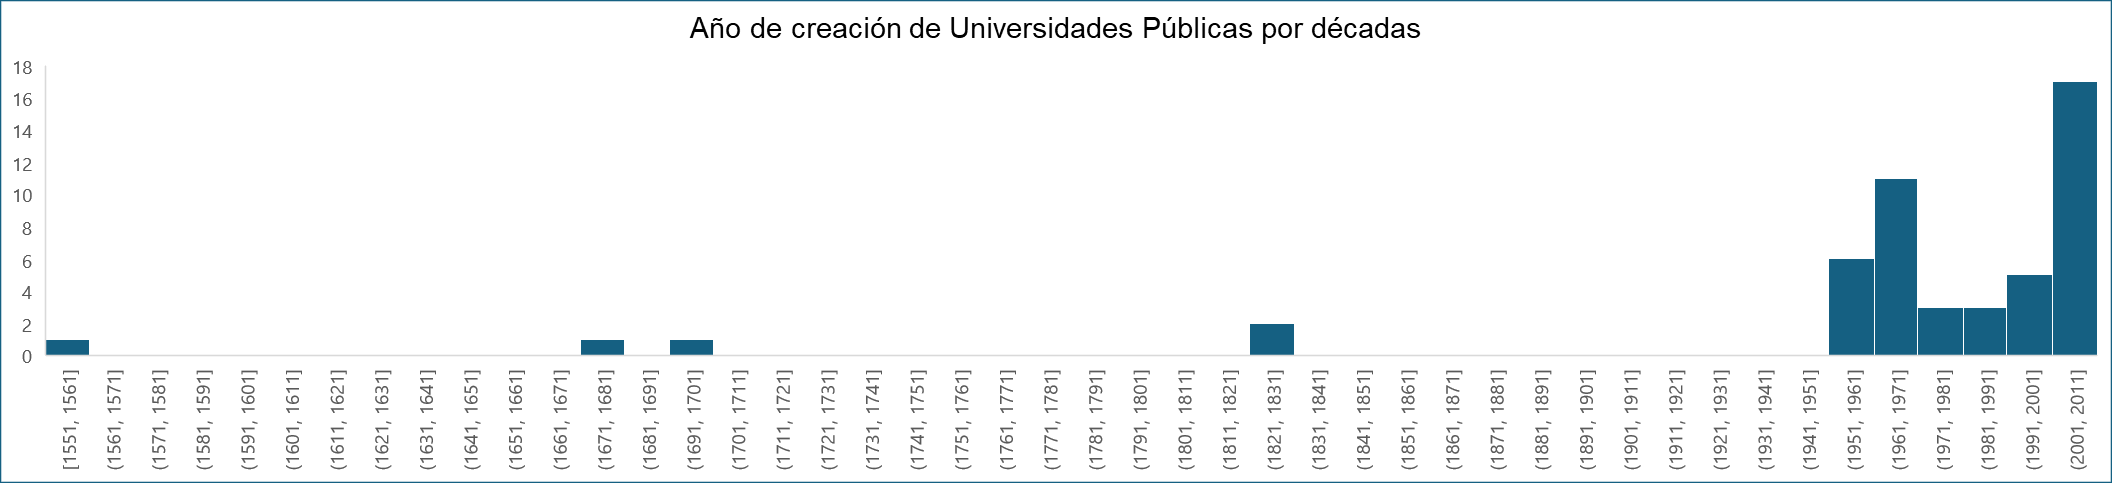

### Ejercicio:

Grafica un diagrama de barras con el año de creación de las universidades privadas.

# 3. ¿En qué departamento se concentra la mayor cantidad de universidades?

Para abordar esta pregunta vamos a utilizar las variables df_publicas y df_privadas. Podemos utilizar directamente estos DataFrames, pero con la finalidad de abordar un nuevo caso de aplicación, vamos a trabajar con un archivo de Excel que contiene 2 pestañas.

Nuestro archivo Excel se llama 'quimica_en_universidades.xlsx' y vamos a **cargarlo en la carpeta de trabajo** para luego guardarlo como una variable llamada "mi_excel":

In [28]:
mi_excel = 'quimica_en_universidades.xlsx'

Esta variable podemos convertirla en un elemento de pandas usando el comando "ExcelFile"

In [ ]:
xls = pd.ExcelFile(mi_excel)

Para trabajar con las pestañas empleamos "sheet_names" en el elemento de pandas xls:

In [ ]:
sheet_names = xls.sheet_names

Como sheet_names contiene las pestañas podemos usar corchetes para llamar cada una, recordando que el conteo inicia en cero:

In [ ]:
df_hoja1 = pd.read_excel(mi_excel, sheet_name=sheet_names[0], index_col=1)
df_hoja2 = pd.read_excel(mi_excel, sheet_name=sheet_names[1], index_col=1)

In [ ]:
df_hoja1.head(2)

,Column1,UNIVERSIDAD,DEPARTAMENTO,PROVINCIA,DISPOSITIVO LEGAL DE CREACIÓN,FECHA DE CREACIÓN,DISPOSITIVO LEGAL DE LICENCIAMIENTO,FECHA DE PUB. DIARIO EL PERUANO
N°,,,,,,,,
1,0,Universidad Nacional Mayor de San Marcos,Lima,Lima,Real Cédula de Fundación,12/05/1551,Res. N° 036-2018-SUNEDU/CD,04/04/2018
2,1,Universidad Nacional de San Cristóbal de Huamanga,Ayacucho,Huamanga,Ley N° 12828,03/07/1677,Res. N° 050-2018-SUNEDU/CD,01/06/2018


In [ ]:
df_hoja2.head(2)

,Column1,UNIVERSIDAD,DEPARTAMENTO,PROVINCIA,DISPOSITIVO LEGAL DE CREACIÓN,FECHA DE CREACIÓN,DISPOSITIVO LEGAL DE LICENCIAMIENTO O DENEGATORIA,FECHA DE PUB. DIARIO EL PERUANO,CONDICIÓN JURÍDICA
N°,,,,,,,,,
1,0,Pontificia Universidad Católica del Perú,Lima,Lima,Decreto Supremo,24/03/1917,Res. N° 025-2016-SUNEDU/CD,2016-07-06,Asociativa
2,1,Universidad Peruana Cayetano Heredia,Lima,Lima,Decreto Supremo N° 18,22/09/1961,Res. N° 029-2016-SUNEDU/CD,2016-07-27,Asociativa


Vamos a eliminar la última columna para sumar los 2 DataFrames

In [ ]:
df_hoja2.drop(["CONDICIÓN JURÍDICA"], axis='columns', inplace=True)
df_hoja2.head(2)

,Column1,UNIVERSIDAD,DEPARTAMENTO,PROVINCIA,DISPOSITIVO LEGAL DE CREACIÓN,FECHA DE CREACIÓN,DISPOSITIVO LEGAL DE LICENCIAMIENTO O DENEGATORIA,FECHA DE PUB. DIARIO EL PERUANO
N°,,,,,,,,
1,0,Pontificia Universidad Católica del Perú,Lima,Lima,Decreto Supremo,24/03/1917,Res. N° 025-2016-SUNEDU/CD,2016-07-06
2,1,Universidad Peruana Cayetano Heredia,Lima,Lima,Decreto Supremo N° 18,22/09/1961,Res. N° 029-2016-SUNEDU/CD,2016-07-27


Ahora si podemos apilar las 2 tablas para evaluar en conjunto, para ello usamos la operacion "concat"

In [ ]:
tabla = pd.concat([df_hoja1,df_hoja2], axis=0)

In [ ]:
tabla

,Column1,UNIVERSIDAD,DEPARTAMENTO,PROVINCIA,DISPOSITIVO LEGAL DE CREACIÓN,FECHA DE CREACIÓN,DISPOSITIVO LEGAL DE LICENCIAMIENTO,FECHA DE PUB. DIARIO EL PERUANO,DISPOSITIVO LEGAL DE LICENCIAMIENTO O DENEGATORIA
N°,,,,,,,,,
1,0,Universidad Nacional Mayor de San Marcos,Lima,Lima,Real Cédula de Fundación,12/05/1551,Res. N° 036-2018-SUNEDU/CD,04/04/2018,NaN
2,1,Universidad Nacional de San Cristóbal de Huamanga,Ayacucho,Huamanga,Ley N° 12828,03/07/1677,Res. N° 050-2018-SUNEDU/CD,01/06/2018,NaN
3,2,Universidad Nacional de San Antonio Abad del C...,Cusco,Cusco,Real Cédula de Fundación,01/06/1692,Res. N° 059-2019-SUNEDU/CD,04/05/2019,NaN
4,3,Universidad Nacional de Trujillo,La Libertad,Trujillo,Decreto Directoral,10/05/1824,Res. N° 127-2018-SUNEDU/CD,20/09/2018,NaN
5,4,Universidad Nacional de San Agustín de Arequipa,Arequipa,Arequipa,Acta de Instalación,11/11/1828,Res. N° 098-2018-SUNEDU/CD,27/08/2018,NaN
...,...,...,...,...,...,...,...,...,...
88,87,Universidad Santo Tomás de Aquino de Ciencia e...,Junín,Huancayo,Res. N° 407-2012-CONAFU,25/07/2012,NaN,NaN,NaN
89,88,Universidad Privada SISE,Lima,Lima,Res. N° 408-2012-CONAFU,25/07/2012,NaN,NaN,NaN
90,89,Universidad Seminario Evangélico de Lima (*12),Lima,Lima,Ley N° 30220,09/07/2014,NaN,NaN,NaN


Notar que se ha perdido información (aparecen como NaN) luego de haber apilado, en este momento no nos afectará pero es recomendable ser cuidadoso con estas operaciones si comprometen la información que se va a analizar.

Nuevamente podemos usar value_counts pero ahora aplicado a la columna "DEPARTAMENTO"

In [ ]:
universidades_en_departamentos = tabla["DEPARTAMENTO"].value_counts()
universidades_en_departamentos

DEPARTAMENTO
Lima             55
La Libertad       8
Junín             8
Arequipa          7
Cusco             6
Lambayeque        6
Loreto            5
Puno              4
Ancash            4
Cajamarca         4
Apurímac          3
Amazonas          3
Tacna             3
Piura             3
Ayacucho          3
Huánuco           3
Huancavelica      3
Ica               3
Ucayali           3
Moquegua          2
Callao            2
Tumbes            1
Madre De Dios     1
San Martín        1
Pasco             1
Name: count, dtype: int64

<Axes: xlabel='DEPARTAMENTO'>

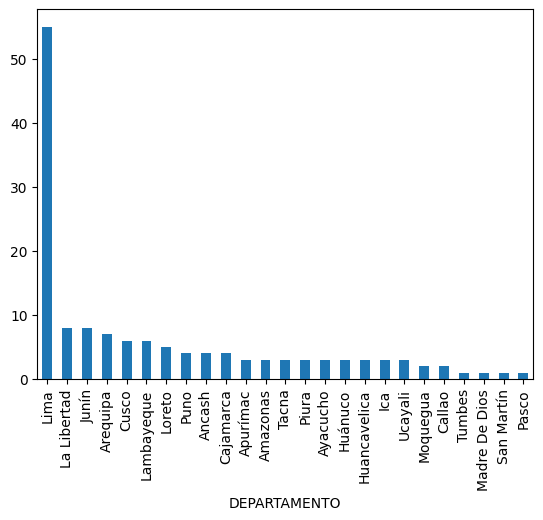

In [ ]:
universidades_en_departamentos.plot(kind='bar')

Observamos que en Lima se encuentran 55 de 142 universidades, una gran diferencia con respecto al 2do lugar, La Libertad con 8 universidades.

# D. Actividad: ¿En qué universidades de Perú se enseña la carrera de Química?

https://carrerasuniversitarias.pe/universidades/universidad-nacional-de-ingenieria/licenciatura-en-quimica